### [Morphological Transformations](https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html)
Learn about morphological transformations like Erosion, Dilation, Opening, Closing etc

#### Goal
이 챕터에서는,
* 우리는 Erosion, Dilation, Opening, Closing과 같은 다른 형태학적인 작동을 배울 것입니다.
* 우리는 **[cv.erode()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb) , [cv.dilate()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c) , [cv.morphologyEx()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f)** 등과 같은 다른 함수를 보게 될 것입니다 .

#### Theory
형태 변형은 이미지 모양을 기반으로 한 몇 가지 간단한 작업입니다. 일반적으로 이진 이미지에서 수행됩니다. 그것은 두 개의 입력이 필요합니다. 하나는 우리의 원래 이미지이고, 두 번째는 **구조 요소** 라고 부릅니다. 또는 조작의 본질을 결정하는 **커널** 입니다. 두 가지 기본적인 형태학 연산자는 침식과 탈모입니다. 그런 다음 **Opening, Closing, Gradient** 등과 같은 변형 된 형태도 작용합니다. 우리는 다음 이미지의 도움을 받아 하나씩 보게 될 것입니다 :
![](j.png)

##### 1. Erosion
침식의 기본 개념은 토양 침식과 같습니다. 전경 물체의 경계를 부식시킵니다 (항상 전경을 흰색으로 유지하려고 노력하십시오). 그래서 그것은 무엇입니까? 커널은 2D 컨볼 루션 에서처럼 이미지를 통해 슬라이드합니다. 원래 이미지의 픽셀 (1 또는 0)은 커널 아래의 모든 픽셀이 1 인 경우에만 1로 간주되고, 그렇지 않으면 침식 (0으로 설정)됩니다.

그렇다면 경계의 모든 픽셀은 커널의 크기에 따라 버려집니다. 따라서 전경 물체의 두께 나 크기가 줄어들거나 단순히 이미지의 흰색 영역이 줄어 듭니다. **작은 흰색 노이즈를 제거**하고 (컬러 스페이스 장에서 보았 듯이) 연결된 두 객체를 분리하는 데 유용합니다.

여기 예를 들어 5x5 커널에 1x5 커널을 사용할 것입니다. 그것이 어떻게 작동하는지 보자 :

In [83]:
import cv2 as cv
import numpy as np
import sys
sys.path.insert(0, '../common')
import bonghanUtil as u
from matplotlib import pyplot as plt

img = cv.imread('../data/j.png', cv.COLOR_BGR2GRAY)
kernel = np.ones((5, 5), np.uint8)
#kernel = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))

erosion = cv.erode(img, kernel, iterations = 1)

u.showImage(erosion)

![](erosion.png)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255 255   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255
  255 255   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255   0   0   0   0   0   0   0   0   0   0   0 2

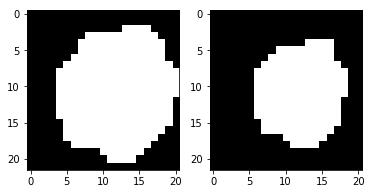

In [84]:
print(np.hstack((img[6:28, 62:83, -1], erosion[6:28, 62:83, -1])))

plt.subplot(121), plt.imshow(img[6:28, 62:83, -1], 'gray')
plt.subplot(122), plt.imshow(erosion[6:28, 62:83, -1], 'gray')
plt.show()

##### 2. Dilation
그것은 침식의 정반대입니다. 여기서, 커널 아래의 적어도 하나의 픽셀이 '1'이면 픽셀 요소는 '1'이다. 따라서 이미지의 흰색 영역이 증가하거나 전경 객체의 크기가 커집니다. 일반적으로 소음 제거와 같은 경우에는 침식 후에 팽창이 발생합니다. 왜냐하면 침식은 백색 잡음을 제거하지만, 또한 우리의 목적을 축소시킵니다. 그래서 우리는 그것을 팽창시킵니다. 소음이 사라지므로 소리가 돌아 오지 않지만 물체가 증가합니다. 또한 객체의 깨진 부분을 결합하는 데 유용합니다.

In [49]:
dilation = cv.dilate(img, kernel, iterations = 1)

u.showImage(dilation)

![](dilation.png)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255 255
  255 255 255 255   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255
  255 255 255 255 255   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 255 255 255 255   0
    0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
    0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255   0   0   0   0   0 255 255 255 255 255 255 2

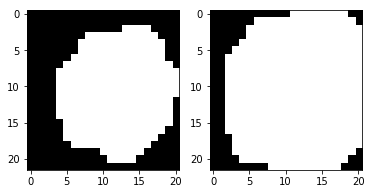

In [50]:
print(np.hstack((img[6:28, 62:83, -1], dilation[6:28, 62:83, -1])))

plt.subplot(121), plt.imshow(img[6:28, 62:83, -1], 'gray')
plt.subplot(122), plt.imshow(dilation[6:28, 62:83, -1], 'gray')
plt.show()

#####  3. Opening
오프닝은 침식과 팽창의 또 다른 이름입니다 . 위에서 설명했듯이 소음을 제거하는 데 유용합니다. 여기에서는 cv.morphologyEx() 함수를 사용합니다.

In [60]:
img = cv.imread('../data/noisy_j.png', cv.COLOR_BGR2GRAY)

opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

u.showImage(np.hstack((img, opening)))

![](opening.png)

##### 4. Closing

닫히기는 여는 것과 반대이며, 침식에 이어 확장입니다. 전경 개체 내부의 작은 구멍을 닫거나 개체의 작은 검은 점을 닫을 때 유용합니다.

In [78]:
img = cv.imread('../data/noisy2_j.png', cv.COLOR_BGR2GRAY)

closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

u.showImage(np.hstack((img, closing)))

![](closing.png)
##### 5. Morphological Gradient

그것은 이미지의 확장과 침식의 차이입니다.
결과는 객체의 윤곽선처럼 보입니다.

In [77]:
img = cv.imread('../data/j.png', cv.COLOR_BGR2GRAY)
                 
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

u.showImage(np.hstack((img, gradient)))

![](gradient2.png)
##### 6. Top Hat

그것은 입력 이미지와 이미지 열기 사이의 차이입니다. 아래 예제는 9x9 커널에 대해 수행됩니다.

In [75]:
img = cv.imread('../data/j.png', cv.COLOR_BGR2GRAY)

kernel = np.ones((9, 9), np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

u.showImage(np.hstack((img, tophat)))

![](tophat.png)
##### 7. Black Hat
It is the difference between the closing of the input image and input image.

In [79]:
img = cv.imread('../data/j.png', cv.COLOR_BGR2GRAY)

kernel = np.ones((9, 9), np.uint8)
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

u.showImage(np.hstack((img, blackhat)))

1[](blackhat.png)

#### Structuring Element
mpy의 도움을 받아 앞의 예제에서 수동으로 구조 요소를 만들었습니다. 사각형 모양입니다. 그러나 어떤 경우에는 타원형 / 원형 커널이 필요할 수도 있습니다. 그래서이 목적을 위해 OpenCV는 [cv.getStructuringElement()](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc) 함수를 가지고 있습니다. 커널의 모양과 크기 만 전달하면 원하는 커널을 얻을 수 있습니다.


In [86]:
# Rectangular Kernel
print('# Rectangular Kernel')
print(cv.getStructuringElement(cv.MORPH_RECT, (5, 5)))

# Elliptical Kernel
print('# RElliptical Kernel')
print(cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5)))

# Cross-shaped Kernel
print('# Cross-shaped Kernel')
print(cv.getStructuringElement(cv.MORPH_CROSS,(5,5)))

# Rectangular Kernel
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
# RElliptical Kernel
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
# Cross-shaped Kernel
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


#### Additional Resources
1. [Morphological Operations](http://homepages.inf.ed.ac.uk/rbf/HIPR2/morops.htm) at HIPR2

#### Exercises